## Outliers

An outlier is a data point which is significantly different from the remaining data. “An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism.” [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]


### Should outliers be removed?

Depending on the context, outliers either deserve special attention or should be completely ignored. Take the example of revenue forecasting: if unusual spikes of revenue are observed, it's probably a good idea to pay extra attention to them and figure out what caused the spike. In the same way, an unusual transaction on a credit card is usually a sign of fraudulent activity, which is what the credit card issuer wants to prevent. So in instances like these, it is useful to look for and investigate further outlier values.

If outliers are however, due to mechanical error, measurement error or anything else that can't be generalised, it’s a good idea to filter out these outliers before feeding the data to the modeling algorithm. 


### Which machine learning models are sensitive to outliers?

Some machine learning models are more sensitive to outliers than others. For instance, AdaBoost may treat outliers as "hard" cases and put tremendous weights on outliers, therefore producing a model with bad generalisation.

Decision trees tend to ignore the presence of outliers when creating the branches of their trees. Typically, trees make decisions by asking if variable x >= value t, and therefore the outlier will fall on each end of the branch, but it will be treated equally than the remaining values, regardless of its magnitude.

Linear models, in particular Linear Regression, can be sensitive to outliers.

A recent research article suggests that Neural Networks could also be sensitive to outliers, provided the number of outliers is high and the deviation is also high. I would argue that if the number of outliers is high (>15% as suggested in the article), then they are no longer outliers, and rather a fair representation of that variable. A link to this article can be found in the "Additional reading resources" lecture within this section of the course.

**For an overview on whether different machine learning models are sensitive to outliers refer to the "Bonus lecture: Machine Learning algorithms overview".**


### How can outliers be identified?

Outlier analysis and anomaly detection are a huge field of research devoted to optimise methods and create new algorithms to reliably identify outliers. There are a huge number of ways optimised to detect outliers in different situations. These are mostly targeted to identify outliers when those are the observations that we indeed want to focus on, for example for fraudulent credit card activity.

In this course, I would rather focus on identifying outliers introduced by mechanical error, so that we can process them before using them in machine learning algorithms.


#### Extreme Value Analysis

The most basic form of outlier detection is Extreme Value Analysis of 1-dimensional data. The key for this method is to determine the statistical tails of the underlying distribution of the variable, and then finding the values that sit at the very end of the tails.

In the typical scenario, the distribution of the variable is Gaussian and thus outliers will lie outside the mean plus or minus 3 times the standard deviation of the variable.

If the variable is not normally distributed, a general approach is to calculate the quantiles, and then the interquantile range (IQR), as follows:

IQR = 75th quantile - 25th quantile

An outlier will sit outside the following upper and lower boundaries:

Upper boundary = 75th quantile + (IQR * 1.5)

Lower boundary = 25th quantile - (IQR * 1.5)

or for extreme cases:

Upper boundary = 75th quantile + (IQR * 3)

Lower boundary = 25th quantile - (IQR * 3)




## Real Life example: 

### Predicting Survival on the Titanic: understanding society behaviour and beliefs

Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

====================================================================================================

To download the Titanic data, go ahead to this [website](https://www.kaggle.com/c/titanic/data)

Click on the link 'train.csv', and then click the 'download' blue button towards the right of the screen, to download the dataset. Save it in a folder of your choice.

**Note that you need to be logged in to Kaggle in order to download the datasets**.

If you save it in the same directory from which you are running this notebook, and you rename the file to 'titanic.csv' then you can load it the same way I will load it below.

====================================================================================================

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [2]:
# let's load the titanic dataset

data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
import seaborn as sns

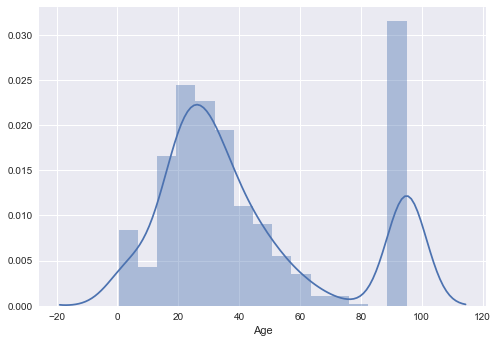

In [10]:
sns.distplot(data.Age.fillna(95))

There are 2 numerical variables in this dataset, Fare and Age. So let's go ahead and find out whether they present values that we could consider outliers.

### Fare

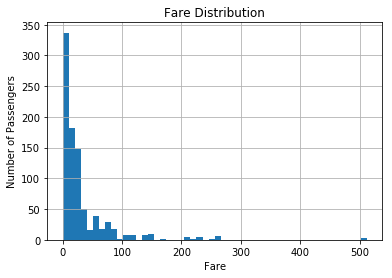

In [3]:
# First let's plot a histogram to get an idea of the distribution

fig = data.Fare.hist(bins=50)
fig.set_title('Fare Distribution')
fig.set_xlabel('Fare')
fig.set_ylabel('Number of Passengers')

The distribution of Fare is skewed, so in principle, we shouldn't estimate outliers using the mean plus minus 3 standard deviations methods, which assumes a normal distribution of the data.

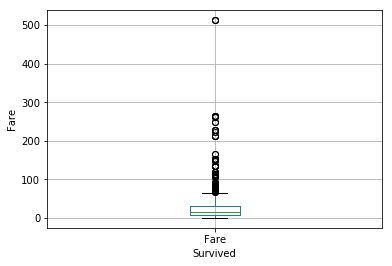

In [4]:
# another way of visualising outliers is using boxplots and whiskers,
# which provides the quantiles (box) and inter-quantile range (whiskers),
# with the outliers sitting outside the error bars (whiskers).

# All the dots in the plot below are outliers according to the quantiles + 1.5 IQR rule

fig = data.boxplot(column='Fare')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Fare')

In [5]:
# let's look at the values of the quantiles so we can
# calculate the upper and lower boundaries for the outliers

# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [6]:
# Let's calculate the upper and lower boundaries
# to identify outliers according
# to interquantile proximity rule

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Lower_fence = data.Fare.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(65.6344, -26.724, 23.0896)

In [7]:
# And if we are looking at really extreme values
# using the interquantile proximity rule

IQR = data.Fare.quantile(0.75) - data.Fare.quantile(0.25)

Lower_fence = data.Fare.quantile(0.25) - (IQR * 3)
Upper_fence = data.Fare.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(100.2688, -61.358399999999996, 23.0896)

The upper boundary for extreme outliers is a cost of 100 dollars for the Fare. The lower boundary is meaningless because there can't be a negative price for Fare.

In [8]:
# lets look at the actual number of passengers on the upper Fare ranges

print('total passengers: {}'.format(data.shape[0]))

print('passengers that paid more than 65: {}'.format(
    data[data.Fare > 65].shape[0]))

print('passengers that paid more than 100: {}'.format(
    data[data.Fare > 100].shape[0]))

total passengers: 891
passengers that paid more than 100: 116
passengers that paid more than 200: 53


In [9]:
# and percentages of passengers
total_passengers = np.float(data.shape[0])

print('total passengers: {}'.format(data.shape[0] / total_passengers))

print('passengers that paid more than 65: {}'.format(
    data[data.Fare > 65].shape[0] / total_passengers))

print('passengers that paid more than 100: {}'.format(
    data[data.Fare > 100].shape[0] / total_passengers))

total passengers: 1.0
passengers that paid more than 100: 0.13019079685746351
passengers that paid more than 200: 0.05948372615039282


When using the 3  times interquantile range itnerval to find outliers, we find that 6% of the passengers have paid extremely high fares.
We can go ahead and investigate the nature of this outliers.

In [10]:
# let's create a separate dataframe for high fare payers
high_fare_df = data[data.Fare>100]

# ticket: it indicates the people that bought their fares together
high_fare_df.groupby('Ticket')['Fare'].count()

Ticket
113503      1
113760      4
113781      4
16966       2
17421       4
19950       4
24160       3
35273       3
36928       2
PC 17483    1
PC 17558    2
PC 17569    2
PC 17582    3
PC 17608    2
PC 17611    2
PC 17755    3
PC 17757    4
PC 17758    2
PC 17760    3
PC 17761    2
Name: Fare, dtype: int64

A group of people who bought their tickets together, say they were a family, would have the same ticket number. And the fare attached to them is no longer the individual Fare, rather the group Fare. This is why, we see this unusually high values:

In [11]:
multiple_tickets = pd.concat(
    [
        high_fare_df.groupby('Ticket')['Fare'].count(),
        high_fare_df.groupby('Ticket')['Fare'].mean()
    ],
    axis=1)

multiple_tickets.columns = ['Ticket', 'Fare']
multiple_tickets.head(10)

,Ticket,Fare
Ticket,,
113503,1,211.5000
113760,4,120.0000
113781,4,151.5500
16966,2,134.5000
17421,4,110.8833
19950,4,263.0000
24160,3,211.3375
35273,3,113.2750
36928,2,164.8667


Therefore, the fare should be divided by the number of tickets bought together to find out the individual price. So we see how finding out and investigating the presence of outliers, can lead us to new insight about the dataset at hand. 

Go ahead and divide the Fare by the number of tickets bought together, and then repeat the finding outliers exercise on this newly created variable. Do you know how to do this in python?

If not, don't worry, I will show you how to calculate individual ticket price in the final lecture of this course in the section "Putting it all together".

For now, let's just go ahead and visualise a group of people that were seemingly travelling together and therefore bought the tickets together:

In [12]:
# let's have a look at the most extreme outliers
data[data.Fare>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


These three people have the same ticket number, indicating that they were travelling together. The Fare price in this case, 512 is the price of 3 tickets, and not one. This is why, it is unusually high.

### Age

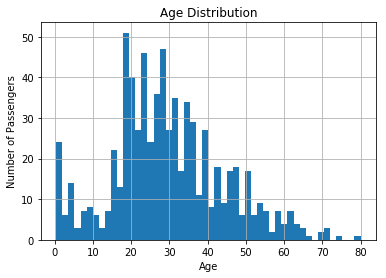

In [13]:
# First let's plot the histogram to get an idea of the distribution

fig = data.Age.hist(bins=50)
fig.set_title('Age Distribution')
fig.set_xlabel('Age')
fig.set_ylabel('Number of Passengers')

Although the distribution of Age does not look strictly normal, we could assume normality and use the Gaussian approach to find outliers. See below.

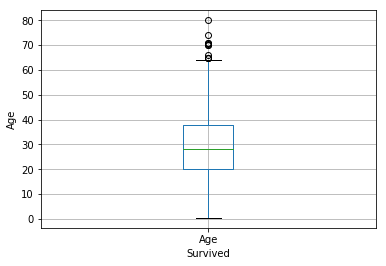

In [14]:
# now let's plot the boxplots and whiskers to visualise
# outliers

# remember that the dots in the plot indicate outliers,
# the box the interquantile range, and the whikers the 
# range IQR + or - 1.5 times the quantiles

fig = data.boxplot(column='Age')
fig.set_title('')
fig.set_xlabel('Survived')
fig.set_ylabel('Age')

In [15]:
# let's visualise median and quantiles

# 25%, 50% and 75% in the output below indicate the
# 25th quantile, median and 75th quantile respectively

data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# Let's calculate the boundaries outside which sit the outliers
# assuming Age follows a Gaussian distribution

Upper_boundary = data.Age.mean() + 3* data.Age.std()
Lower_boundary = data.Age.mean() - 3* data.Age.std()

Upper_boundary, Lower_boundary

(73.27860964406095, -13.88037434994331)

The upper boundary for Age is 73-74 years. The lower boundary is meaningless as there can't be negative age. This value could be generated due to the lack of normality of the data.

In [17]:
# now let's use the interquantile range to calculate the boundaries

IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)

Lower_fence = data.Age.quantile(0.25) - (IQR * 1.5)
Upper_fence = data.Age.quantile(0.75) + (IQR * 1.5)

Upper_fence, Lower_fence, IQR

(64.8125, -6.6875, 17.875)

In [18]:
# and for extreme outliers

IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)

Lower_fence = data.Age.quantile(0.25) - (IQR * 3)
Upper_fence = data.Age.quantile(0.75) + (IQR * 3)

Upper_fence, Lower_fence, IQR

(91.625, -33.5, 17.875)

The boundary using 1.5 times the interquantile range coincides roughly with the boundary determined using the Gaussian distribution (64 vs 71 years). The value using the 3 times the interquantile is a bit high according to normal human life expectancy, particularly in the days of the Titanic.

In [19]:
# let's find out whether there are outliers according to the above boundaries:

# let's remove first the passengers with missing data for Age
data = data.dropna(subset=['Age'])

total_passengers = np.float(data.shape[0])

print('passengers older than 73 (Gaussian approach): {}'.format(
    data[data.Age > 73].shape[0] / total_passengers))

print('passengers older than 65 (IQR): {}'.format(
    data[data.Age > 65].shape[0] / total_passengers))

print('passengers older than 91 (IQR, extreme): {}'.format(
    data[data.Age >= 91].shape[0] / total_passengers))

passengers older than 73 (Gaussian approach): 0.0028011204481792717
passengers older than 65 (IQR): 0.011204481792717087
passengers older than 91 (IQR, extreme): 0.0


Roughly ~1-2 percent of the passengers were extremely old.

In [20]:
data[data.Age>65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


We can see that the majority of the outliers did not survive.

We have now identified a bunch of potential outliers. Let's see whether these affect the performance of the machine learning algorithms.

## Measuring the effect of outliers on different machine learning algorithms

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [22]:
# let's load the titanic dataset again

data = pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# let's find out if the variables contain missing data

data[['Age', 'Fare']].isnull().mean()

Age     0.198653
Fare    0.000000
dtype: float64

Age contains 20 % of missing data. For simplicity, I will fill the missing values with 0.

In [24]:
# let's separate into training and testing set

# remember that to avoid overfitting and improve generalisation
# machine learning models need to be built on a train set
# and evaluated on a test set

X_train, X_test, y_train, y_test = train_test_split(
    data[['Age', 'Fare']].fillna(0),
    data.Survived,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [25]:
# Let's generate training and testing sets without outliers

# For simplicity, I will replace outliers by the upper boundary values
# this procedure is called capping or top-coding and I will cover it
# extensively in the section of handling outliers later in the course

# let's create a new dataset
data_clean = data.copy()

# replace outliers in Age
# using the boundary from the Gaussian assumption method
data_clean.loc[data_clean.Age >= 73, 'Age'] = 73

# replace outliers in Fare
# using the boundary of the interquantile range method
data_clean.loc[data_clean.Fare > 100, 'Fare'] = 100

# Let's divide into train and test sets
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    data_clean[['Age', 'Fare']].fillna(0),
    data_clean.Survived,
    test_size=0.3,
    random_state=0)

### Outlier effect on Logistic Regression

In [26]:
# model build on data with outliers

# call model
logit = LogisticRegression(random_state=44)

# train model
logit.fit(X_train, y_train)

# make predicion on test set
pred = logit.predict_proba(X_test)

print('LogReg Accuracy: {}'.format(logit.score(X_test, y_test)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

LogReg Accuracy: 0.6940298507462687
LogReg roc-auc: 0.7132142857142858


In [27]:
# model build on data without outliers

# call model
logit = LogisticRegression(random_state=44)

# train
logit.fit(X_train_clean, y_train_clean)

# make prediction on test set
pred = logit.predict_proba(X_test_clean)

print('LogReg Accuracy: {}'.format(logit.score(X_test_clean, y_test_clean)))
print('LogReg roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:, 1])))

LogReg Accuracy: 0.7052238805970149
LogReg roc-auc: 0.7133333333333333


Outliers did not seem to have a big impact in the performance of Logistic regression.

### Outlier Effect on Adaboost

In [28]:
# model built on data with outliers

# call model
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# train model
ada.fit(X_train, y_train)

# make predictions
pred = ada.predict_proba(X_test)

print('AdaBoost Accuracy: {}'.format(ada.score(X_test, y_test)))
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

AdaBoost Accuracy: 0.7201492537313433
AdaBoost roc-auc: 0.7464583333333332


In [29]:
# model built on data without the outliers

# call model
ada = AdaBoostClassifier(n_estimators=200, random_state=44)

# train model
ada.fit(X_train_clean, y_train_clean)

# make predictions
pred = ada.predict_proba(X_test_clean)

print('AdaBoost Accuracy: {}'.format(ada.score(X_test_clean, y_test_clean)))
print('AdaBoost roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:,1])))

AdaBoost Accuracy: 0.7089552238805971
AdaBoost roc-auc: 0.7596130952380953


On the other hand, we can see how removing outliers improves the performance of Adaboost: 0.759 vs 0.746 roc-auc.

### Outlier Effect on Random Forests

In [30]:
# model built on data with outliers

# call model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train model
rf.fit(X_train, y_train)

# make predictions
pred = rf.predict_proba(X_test)

print('Random Forests Accuracy: {}'.format(rf.score(X_test, y_test)))
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:, 1])))

Random Forests Accuracy: 0.7089552238805971
Random Forests roc-auc: 0.7324107142857142


In [31]:
# model built on data without outliers

# call model
rf = RandomForestClassifier(n_estimators=200, random_state=39)

# train model
rf.fit(X_train_clean, y_train_clean)

# make predictions
pred = rf.predict_proba(X_test_clean)

print('Random Forests Accuracy: {}'.format(rf.score(X_test_clean, y_test_clean)))
print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test_clean, pred[:,1])))

Random Forests Accuracy: 0.6977611940298507
Random Forests roc-auc: 0.7285714285714286


As expected, Random Forests do not benefit from removing outliers from the dataset.

**Conclusion**:

We can see that the presence of outliers affects the performance of AdaBoost, and when outliers are removed the roc-auc improved by 0.013. 

Logistic Regression's and Random Forests performances seemed unaffected by outliers.

**That is all for this demonstration. I hope you enjoyed the notebook, and see you in the next one.**